In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os 
from random import shuffle
import cv2
import glob

In [0]:
!unzip -qq ml.zip

In [0]:
TEST_DIR = '/ml/test'
TRAIN_DIR = '/ml/train'
LEARNING_RATE = 1e-3
MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMAGE_SIZE = 50

In [0]:
def label_image(img):
    img_name =img.split('/')[-1].split('.')[0]
    
    
    if img_name == "cat":

      return [1,0]

    elif img_name == "dog":

      return [0,1]

In [0]:
def train_data_loder():
    training_data = []
    
    for img in glob.glob('ml/train/*.*'):
            
            img_lable = label_image(img)
            
            
            img = cv2.resize(cv2.imread(img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
            training_data.append([np.array(img),np.array(img_lable)])

    shuffle(training_data)
    
    np.save("training_data_new.npy",training_data)
    
    return training_data
#This is for Testing Data
def testing_data():
    test_data = []
    
    for img in glob.glob('ml/test/*.*'):
            img_labels =label_image(img)
            
            img = cv2.resize(cv2.imread(img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
            test_data.append([np.array(img),np.array(img_labels)])

    shuffle(test_data)
    np.save("test_dataone.npy",test_data)

    return test_data


In [6]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

W0713 13:20:31.646609 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tflearn/helpers/summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0713 13:20:31.647946 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tflearn/helpers/trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0713 13:20:31.654664 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tflearn/collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0713 13:20:31.660392 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tflearn/config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0713 13:20:31.670055 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/

In [7]:
import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[
None, IMAGE_SIZE, IMAGE_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


W0713 13:20:35.545091 139826258933632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tflearn/layers/core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 13:20:35.548011 139826258933632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tflearn/initializations.py:119: calling UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 13:20:35.550296 139826258933632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py:507: UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent beha

In [0]:
train_data=train_data_loder()

In [0]:

train = train_data[:]


In [0]:
test=testing_data()

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
Y = [i[1] for i in train]

In [0]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
test_y = [i[1] for i in test]


In [13]:
model.fit(X, Y, n_epoch=6, validation_set=(test_x,  test_y), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 23  | total loss: 0.68711 | time: 0.036s
| Adam | epoch: 006 | loss: 0.68711 - acc: 0.5790 -- iter: 192/200
Training Step: 24  | total loss: 0.70790 | time: 1.048s
| Adam | epoch: 006 | loss: 0.70790 - acc: 0.5304 | val_loss: 0.70235 - val_acc: 0.5000 -- iter: 200/200
--


In [0]:
model.save(MODEL_NAME)

In [0]:
test_data = np.load("test_dataone.npy",allow_pickle=True)

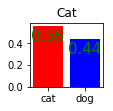

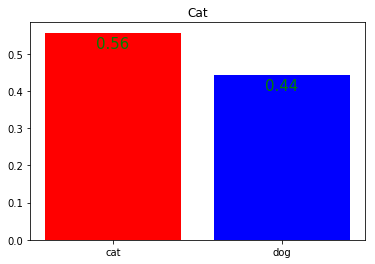

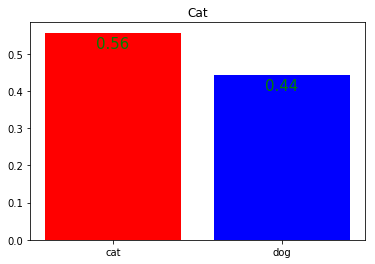

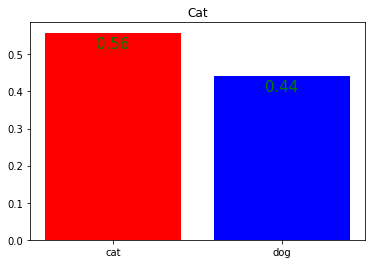

In [18]:
import matplotlib.pyplot as plt

figs = plt.figure()
for num,data in enumerate(test_data[:4]):
    test_img = data[0]
    
    test_lable = data[1]
    test_img_feed = test_img.reshape(IMAGE_SIZE,IMAGE_SIZE,1)
    t = figs.add_subplot(3,4,num+1)
    ores = test_img
    
    model_pred = model.predict([test_img_feed])[0]
    
    xs=np.array(['cat','dog'])
    ys=np.array(model_pred)
    plt.bar(xs,ys,color=['r','b'])
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-15), # distance from text to points (x,y)
                     ha='center',color='green',size=15) # horizontal alignment can be left, right or center
    
    
    if np.argmax(model_pred) == 1:
        pred_val = "Dog"
        plt.title('Dog')
    else:
        pred_val = "Cat"
        plt.title('Cat')
    plt.show()    
        
    


In [0]:
with open("final_results(dogs).csv",mode="w") as f:
    f.write("id,pred \n")
    
with open("final_results.csv(dogs)",mode="a") as r:
    for data in tqdm(test_data):
        img_class = data[1]
        img = data[0]
        imgs = img.reshape((IMAGE_SIZE,IMAGE_SIZE,1))
        model_out = model.predict([imgs])[0]
        r.write("{},{} \n".format(img_class,model_out[1]))

100%|██████████| 40/40 [00:00<00:00, 312.90it/s]
